In [1]:
# MISSING VALUES

In [2]:
# 1- missing completely at ramdom(mcar) 
#tamamen rastgele biçimde eksik datalar var


In [3]:
# 2- missing at ramdom( mar)
# tamamen rastgele değil , bulunan eksik datalar diğer değişkenlerle alakalı olabilir
# ( mesela erkekler boy sutununu bos bırakıyor kadınlar bırakmıyor olabilir)


In [4]:
# 3- missing not at random(mnar)
#  eksikler rastgele değil. ( bir datada geliri yüksek olanlar gelirini yazmıyorsa)


In [5]:
# handling

'''
1-> %5ten az eksik veri varsa o rowları çıkarabiliriz.
2-> imputation: eksik verileri doldur, median mode, mean, KNNimputer vb
3-> yeni kolon açma: true false(0-1) ile eksik veri var mı tutabilir
4-> domain knowledge ile boşluk doldurma.o alanda uzman değilsen yapılmaz.
'''


'\n1-> %5ten az eksik veri varsa o rowları çıkarabiliriz.\n2-> imputation: eksik verileri doldur, median mode, mean, KNNimputer vb\n3-> yeni kolon açma: true false(0-1) ile eksik veri var mı tutabilir\n4-> domain knowledge ile boşluk doldurma.o alanda uzman değilsen yapılmaz.\n'

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df=sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.shape

(891, 15)

In [10]:
df.dropna().shape # çok düşüyor mantıksız !

(182, 15)

In [11]:
df.dropna(axis=1).shape #eksik kolonları attı ama age ve embark_town silinmemeli

(891, 11)

<Axes: xlabel='age', ylabel='Count'>

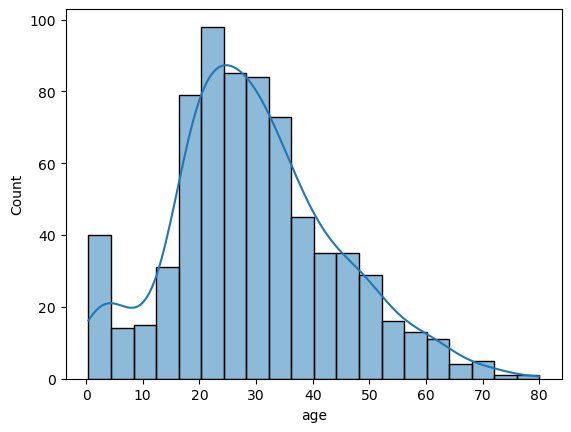

In [12]:
#mean imputation

sns.histplot(data=df.age,kde=True)

In [13]:
df["age_mean"]=df["age"].fillna(df["age"].mean())
df[["age_mean","age"]]

,age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


<Axes: ylabel='age'>

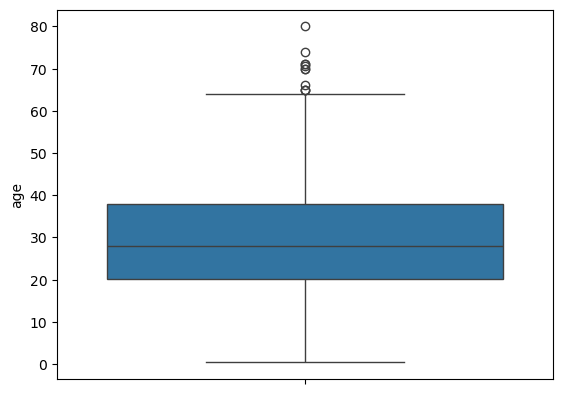

In [14]:
sns.boxplot(data=df,y="age")

In [15]:
df["age_median"]=df["age"].fillna(df["age"].median())
df[["age_median","age"]]

,age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [16]:
#mode imputation : categorical values



In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_mean         0
age_median       0
dtype: int64

In [18]:
df[df["embarked"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [19]:
mode=df[df["embarked"].notna()]["embarked"].mode()[0]
mode

'S'

In [20]:
df["embarked_mode"]=df["embarked"].fillna(mode)

In [21]:
df["embarked_mode"].isnull().sum()

0

In [22]:
# BALANCING DATASET

In [23]:
set1no=900
set2no=100
np.random.seed(42) # tutarlı rastgelelik

In [32]:
df1=pd.DataFrame({
    "feature1":np.random.normal(loc=0, scale=1,size=set1no),
     "feature2":np.random.normal(loc=0, scale=1,size=set1no),
     "target":[0] * set1no
    
  
})

df2=pd.DataFrame({
    "feature1": np.random.normal(loc=0, scale=1,size=set2no),
     "feature2": np.random.normal(loc=0, scale=1,size=set2no),
     "target":[1] * set2no
    
  
})



In [33]:
df1.head()

,feature1,feature2,target
0,-0.863494,-0.391877,0
1,-0.031203,-1.017764,0
2,0.018017,-1.027404,0
3,0.472630,-0.373268,0
4,-1.366858,0.644518,0


In [34]:
df2.head()

,feature1,feature2,target
0,0.295233,-0.070220,1
1,-0.238234,-2.522278,1
2,-0.410518,-0.151967,1
3,1.818899,1.060144,1
4,1.177185,-0.893746,1


In [37]:
df=pd.concat([df1,df2]).reset_index(drop=True)
df

,feature1,feature2,target
0,-0.863494,-0.391877,0
1,-0.031203,-1.017764,0
2,0.018017,-1.027404,0
3,0.472630,-0.373268,0
4,-1.366858,0.644518,0
...,...,...,...
995,1.006730,0.171469,1
996,-1.571152,1.152648,1
997,1.081514,-1.217404,1
998,0.037542,0.467950,1


In [38]:
df["target"].unique()

array([0, 1])

In [39]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [43]:
#upsampling --- azınlıkları arttırmak  -> overfitting olabilir

In [44]:
#downsampling --- fazla olanları azaltmak -> data sayısı azsa kötü bir yol

In [50]:
df_minority=df[df["target"]==1]
df_minority

,feature1,feature2,target
900,0.295233,-0.070220,1
901,-0.238234,-2.522278,1
902,-0.410518,-0.151967,1
903,1.818899,1.060144,1
904,1.177185,-0.893746,1
...,...,...,...
995,1.006730,0.171469,1
996,-1.571152,1.152648,1
997,1.081514,-1.217404,1
998,0.037542,0.467950,1


In [49]:
df_majority=df[df["target"]==0]
df_majority

,feature1,feature2,target
0,-0.863494,-0.391877,0
1,-0.031203,-1.017764,0
2,0.018017,-1.027404,0
3,0.472630,-0.373268,0
4,-1.366858,0.644518,0
...,...,...,...
895,-0.009845,-0.106194,0
896,-1.688505,3.098299,0
897,-1.120047,-0.258175,0
898,0.670911,0.510124,0


In [56]:

from sklearn.utils import resample

In [59]:
df_upsampled=resample(df_minority, replace=True , n_samples=len(df_majority),random_state=42)

In [61]:
df_upsampled

,feature1,feature2,target
951,-0.470203,0.025385,1
992,-1.399078,-0.998307,1
914,-2.435312,-0.234924,1
971,0.208323,0.000756,1
960,1.243406,-0.812546,1
...,...,...,...
952,0.612332,-0.716573,1
965,-0.599821,0.125901,1
976,-1.617801,1.653310,1
942,-1.493510,0.001110,1


In [62]:
df_upsampled.shape

(900, 3)

In [67]:
df_new=pd.concat([df_majority, df_upsampled])
df_new.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [69]:
df_downsampled=resample(df_majority, replace=True, n_samples=len(df_minority), random_state=42)
df_downsampled

,feature1,feature2,target
102,1.351073,-1.795643,0
435,0.695864,-0.497962,0
860,-0.475795,0.029431,0
270,-0.132137,0.309895,0
106,-0.294243,1.048483,0
...,...,...,...
201,-1.090208,0.501685,0
269,0.929410,-1.128063,0
862,-0.687014,-0.981326,0
815,-0.247752,-0.425756,0


In [70]:
df_downsampled["target"].value_counts()

target
0    100
Name: count, dtype: int64

In [72]:
df_new2=pd.concat([df_downsampled,df_minority])
df_new2

,feature1,feature2,target
102,1.351073,-1.795643,0
435,0.695864,-0.497962,0
860,-0.475795,0.029431,0
270,-0.132137,0.309895,0
106,-0.294243,1.048483,0
...,...,...,...
995,1.006730,0.171469,1
996,-1.571152,1.152648,1
997,1.081514,-1.217404,1
998,0.037542,0.467950,1


In [73]:
df_new2.target.value_counts()

target
0    100
1    100
Name: count, dtype: int64

In [75]:
#upsample: datayı kopyalayarak çoğaltıyor çoğu zaman mantıksız bir yöntemdir bunun yerine;
#SMOTE ( synthetic minority oversampling technique)

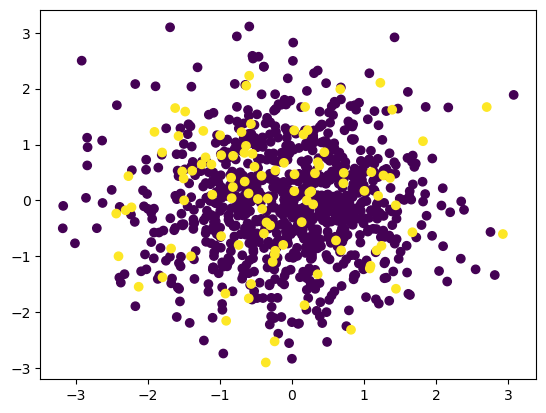

In [77]:
plt.scatter(df["feature1"],df["feature2"] ,c=df["target"])

In [78]:
 !pip install imblearn 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [imblearn]


In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
oversample=SMOTE()

In [84]:
(X,y)=oversample.fit_resample(df[["feature1","feature2"]],df["target"])

In [86]:
X # featurelar

,feature1,feature2
0,-0.863494,-0.391877
1,-0.031203,-1.017764
2,0.018017,-1.027404
3,0.472630,-0.373268
4,-1.366858,0.644518
...,...,...
1795,-0.428956,-0.119457
1796,0.137316,0.513047
1797,-2.256943,-0.145068
1798,0.096517,0.107389


In [88]:
y #target

0       0
1       0
2       0
3       0
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [90]:
overdf=pd.concat([X,y],axis=1)
overdf

,feature1,feature2,target
0,-0.863494,-0.391877,0
1,-0.031203,-1.017764,0
2,0.018017,-1.027404,0
3,0.472630,-0.373268,0
4,-1.366858,0.644518,0
...,...,...,...
1795,-0.428956,-0.119457,1
1796,0.137316,0.513047,1
1797,-2.256943,-0.145068,1
1798,0.096517,0.107389,1


In [94]:
overdf.count()

feature1    1800
feature2    1800
target      1800
dtype: int64

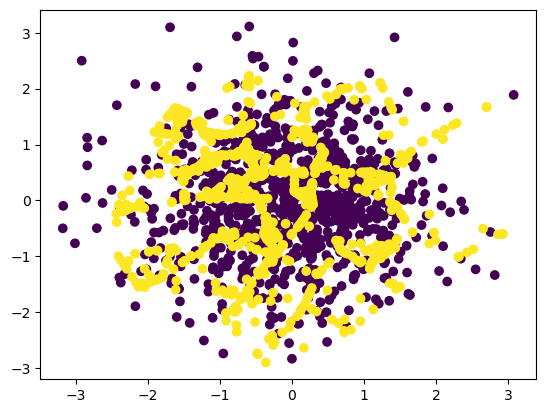

In [95]:
plt.scatter(overdf["feature1"],overdf["feature2"] ,c=overdf["target"])